In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Perceptron

from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

import matplotlib.pyplot as plt

plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

In [2]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target == 0  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predics true or false for these two new samples
# the perceptron is equivalent to a SGDClassifier with loss="perceptron", no regularization, and a constant learning rate = to 1

In [3]:
y_pred

array([ True, False])

In [4]:
# this buids a neural network with 3 hidden layers with 50 neurons each there are no missing values it uses relu activation and Adam optimization similar to gradient descent it has a little bit of l2 regularization that is controled with alpha hyperparameter
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

In [5]:
rmse
# this is comparable to what we got with the random forest
# this doesnt use an activation function in the output layer if we want a positive value we can use relu or softplus or if we want a value between 0 and 1 we can use logistic or softmax but the MLPRegressor class uses no activation function in the output layer
# if there are alot of outliers we can use the huber loss instead of the mse loss it is less sensitive to outliers however MLPRegressor does not support it

0.5053326657968706

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [7]:
X_train.shape

(55000, 28, 28)

In [8]:
X_train.dtype

dtype('uint8')

In [9]:
# we are scaling the pixel intensities down to the 0-1 range and converting them to floats by dividing by 255.
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

In [10]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [11]:
class_names[y_train[0]]

'Ankle boot'

In [12]:
# this is a classification MLP with two hidden layers
tf.keras.utils.set_random_seed(42)
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Input(shape=[28, 28]))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(300, activation="relu"))
# model.add(tf.keras.layers.Dense(100, activation="relu"))
# model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [13]:
# this is the same model as above but setup in a better way
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(300, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


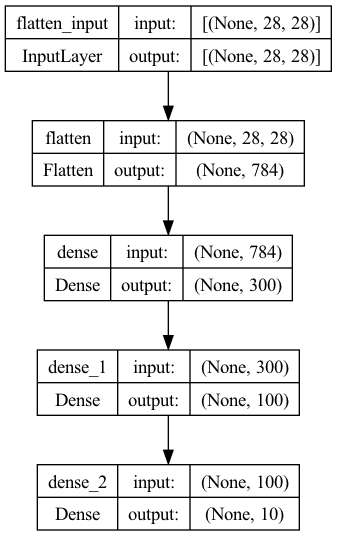

In [14]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [17]:
model.get_layer("dense") is hidden1

True

In [18]:
weights, biases = hidden1.get_weights()
weights

array([[ 5.3297073e-02,  2.4198458e-02, -2.1023259e-02, ...,
         3.5795525e-02, -7.2061256e-02,  4.6089381e-02],
       [ 2.2632368e-02,  5.9892908e-03,  1.4587238e-02, ...,
         8.7194145e-03,  4.9419701e-05,  2.4750374e-02],
       [-4.4513181e-02,  4.6743892e-02,  1.0291643e-02, ...,
        -4.6910450e-02,  1.4408320e-02,  5.3473756e-02],
       ...,
       [-6.0724389e-02, -2.6091568e-02, -2.8863657e-02, ...,
         4.1813411e-02,  3.5757974e-02,  7.3892877e-02],
       [-4.4557646e-02, -5.9672445e-02,  6.5973431e-02, ...,
        -5.0661370e-02, -2.6788648e-02,  5.1353276e-02],
       [-1.4996272e-02,  1.0063291e-02, -3.2075007e-02, ...,
         5.3060532e-02,  6.6655308e-02, -6.4764827e-02]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

In [24]:
# keras knows the shape of the weight matrix because we provided the input shape when creating the first layer if we do not provide the input shape keras will wait until it knows the input shape before it creates the model this will happen during training or when we call its build() method
# after model is created we must compile the model and specify the loss function and the optimizer to use we can also specify a list of extra metrics to compute during training and evaluation
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)
# we use sparse_categorical_crossentropy because we have sparse labels and the classes are exclusive
# if we want to convert sparse labels to one hot vectors we can use keras.utils.to_categorical() function to go the other way we can use np.argmax() function with axis=1
# when using SGD optimizer it is important to ture the learning rate so we generally want to use optimzer=tf.keras.optimizers.SGD(lr=???) rather than optimizer="sgd" which defaults to lr=0.01

In [25]:
# now we can train the model just using fit() method
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7239 - accuracy: 0.7616 - val_loss: 0.5026 - val_accuracy: 0.8298
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4889 - accuracy: 0.8305 - val_loss: 0.4498 - val_accuracy: 0.8368
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4419 - accuracy: 0.8442 - val_loss: 0.4217 - val_accuracy: 0.8546
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4164 - accuracy: 0.8537 - val_loss: 0.3935 - val_accuracy: 0.8596
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3953 - accuracy: 0.8615 - val_loss: 0.3901 - val_accuracy: 0.8622
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3788 - accuracy: 0.8668 - val_loss: 0.3902 - val_accuracy: 0.8640
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3663 - accuracy: 0.8697 - val_loss: 0.3661 - val_accuracy:

In [26]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [27]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


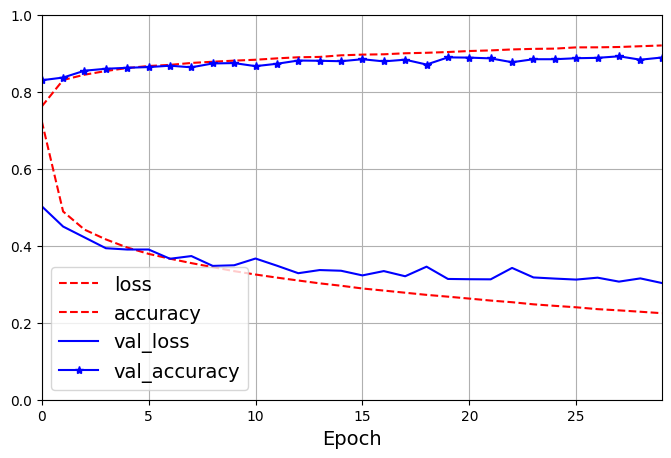

In [29]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
    xlim=[0, 29],
    ylim=[0, 1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--", "b-", "b-*"],
)
plt.show()

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3231 - accuracy: 0.8848


[0.3231135606765747, 0.8848000168800354]

In [31]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 77ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [32]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1])

In [33]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
# we now will train a regression MLP to predict housing prices using the california housing dataset
# we are going to have a normalization layer as the first layer it does the same thing as StandardScaler but it must be fit to the training data using the adapt() method before calling fit() method
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential(
    [
        norm_layer,
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8779 - root_mean_squared_error: 0.9370 - val_loss: 0.3927 - val_root_mean_squared_error: 0.6267
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3809 - root_mean_squared_error: 0.6172 - val_loss: 1.7274 - val_root_mean_squared_error: 1.3143
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3646 - root_mean_squared_error: 0.6038 - val_loss: 1.0083 - val_root_mean_squared_error: 1.0041
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3461 - root_mean_squared_error: 0.5883 - val_loss: 1.1610 - val_root_mean_squared_error: 1.0775
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3333 - root_mean_squared_error: 0.5773 - val_loss: 1.6537 - val_root_mean_squared_error: 1.2860
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3349 - root_mean_squared_error: 0.5787 - val_loss: 0.6499 - val_

In [36]:
rmse_test

0.5306867361068726

In [37]:
y_pred

array([[0.5366276],
       [1.199072 ],
       [5.404941 ]], dtype=float32)

In [38]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [40]:
# this is a wide and deep neural network it connects all or part of the inputs directly to the output layer it is capable of learning both deep patterns and simple rules
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.models.Model(inputs=[input_], outputs=[output])

In [41]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 normalization_1 (Normalization  (None, 8)           17          ['input_1[0][0]']                
 )                                                                                                
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['normalization_1[0][0]']        
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']              

In [44]:
# to send a subset of the features through the wide path and a different subset through the deep path we can use multiple inputs
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.Concatenate()([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [45]:
# each dense layer is created and caled on the same line this is a common practice as it make the code more concise without losing clarity. we cant do this with the normalization layers because we nee a reference to the layer to be able to call its adapt() method later
# we use tf.keras.layers.concatenate() whih creates a concatenate layer and calls it with the given inputs
# we then compile the model as usual but when the fit() method is called we must pass a pair of matrices (X_train_A, X_train_B) one per input
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep),
    y_train,
    epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), y_valid),
)
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3750 - root_mean_squared_error: 1.1726 - val_loss: 0.8934 - val_root_mean_squared_error: 0.9452
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5324 - root_mean_squared_error: 0.7297 - val_loss: 0.6164 - val_root_mean_squared_error: 0.7851
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4633 - root_mean_squared_error: 0.6807 - val_loss: 0.6071 - val_root_mean_squared_error: 0.7792
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4351 - root_mean_squared_error: 0.6596 - val_loss: 0.5608 - val_root_mean_squared_error: 0.7489
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4158 - root_mean_squared_error: 0.6448 - val_loss: 0.3886 - val_root_mean_squared_error: 0.6234
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3969 - root_mean_squared_error: 0.6300 - val_loss: 0.5437 - val_

In [46]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

In [47]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss=("mse", "mse"),
    loss_weights=(0.9, 0.1),
    optimizer=optimizer,
    metrics=["RootMeanSquaredError"],
)

In [48]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
)

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 1.7683 - dense_8_loss: 1.7092 - dense_9_loss: 2.2999 - dense_8_root_mean_squared_error: 1.3074 - dense_9_root_mean_squared_error: 1.5165 - val_loss: 0.6376 - val_dense_8_loss: 0.5974 - val_dense_9_loss: 0.9991 - val_dense_8_root_mean_squared_error: 0.7729 - val_dense_9_root_mean_squared_error: 0.9995
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5241 - dense_8_loss: 0.5003 - dense_9_loss: 0.7386 - dense_8_root_mean_squared_error: 0.7073 - dense_9_root_mean_squared_error: 0.8594 - val_loss: 0.7458 - val_dense_8_loss: 0.7570 - val_dense_9_loss: 0.6443 - val_dense_8_root_mean_squared_error: 0.8701 - val_dense_9_root_mean_squared_error: 0.8027
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4495 - dense_8_loss: 0.4349 - dense_9_loss: 0.5808 - dense_8_root_mean_squared_error: 0.6595 - dense_9_root_mean_squared_error: 0.7621 - val_loss: 0.4560 - val_dense_8_loss

In [49]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 0s 1ms/step - loss: 0.3358 - dense_8_loss: 0.3270 - dense_9_loss: 0.4153 - dense_8_root_mean_squared_error: 0.5718 - dense_9_root_mean_squared_error: 0.6444


In [50]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 118ms/step


In [52]:
# to create a dictionary as a return you can use the following
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))
y_pred

1/1 [==============================] - 0s 26ms/step


{'dense_8': array([[0.3887573],
        [1.086349 ],
        [3.540136 ]], dtype=float32),
 'dense_9': array([[0.53970915],
        [1.0927747 ],
        [3.4391074 ]], dtype=float32)}